In [1026]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [1027]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1028]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [1029]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [1030]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [1031]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [1032]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [1033]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [1034]:
# Find the most recent date in the data set.

most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

Query Date:  2016-08-23


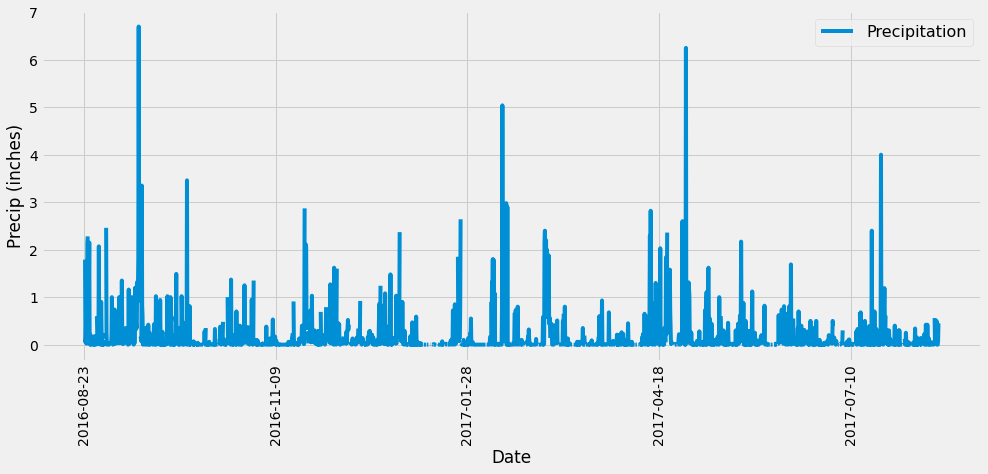

In [1084]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# # Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
     filter(Measurement.date >= query_date)

# # Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_data, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)

# # Sort the dataframe by date
df.sort_index(inplace=True)

# # Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize = (15, 6))
plt.legend(prop={'size':16})
plt.xticks(fontsize = 14, rotation='vertical')
plt.yticks(fontsize = 14)
plt.ylabel('Precip (inches)')
plt.show()



In [1085]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_agg = df.agg(['mean', 'median', 'var', 'std', 'sem'])
precip_agg

,Precipitation
mean,0.177279
median,0.020000
var,0.212696
std,0.461190
sem,0.010259


# Exploratory Station Analysis

In [1086]:
# Design a query to calculate the total number stations in the dataset
tot_stations = session.query(Station).group_by(Station.station).count()
print(f'The total number of stations is {tot_stations}')

The total number of stations is 9


In [1087]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station,
       func.count(Measurement.station)]
most_active = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [1088]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

most_active_temps = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()

most_active_temps

df = pd.DataFrame(most_active_temps, columns=['station', 'min', 'max', 'avg'])
df.set_index('station', inplace=True)
df





,min,max,avg
station,,,
USC00519281,54.0,85.0,71.663781


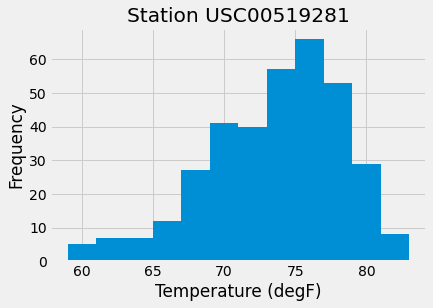

In [1089]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.date >= query_date).filter(Measurement.station == 'USC00519281').all()

temp_rows = [{"Date": result[0], "Temperature": result[1]} for result in temp_obs]

pd.DataFrame(temp_rows).set_index("Date").hist(bins=12)
plt.xlabel('Temperature (degF)')
plt.ylabel('Frequency')
plt.title('Station USC00519281')
plt.show()

# Close session

In [1090]:
# Close Session
session.close()